In [336]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap

In [323]:
root_dir = '/Users/Ethan/Documents/UW/By date (one-time)/'
survey = pd.read_excel(root_dir + '2020-09-13 - SoO culture survey - raw data.xlsx')

In [324]:
# clean data; extract labels
q_labels = survey.keys().values.astype(str)                             # question labels
survey.iloc[where(survey.iloc[:,0] == 'Retiree')[0],0] = 'Retirees'     # consolidate this particular label
groups_unordered = array(sorted(survey.iloc[:,0].unique().astype(str)))
groups = groups_unordered[[9,3,5,6,2,8,0,1,7]]                          # ordered and with 'I prefer not to answer' removed
identities_all = survey.iloc[:,1].unique().astype(str)
identities_single_unordered = array([entry for entry in identities_all if (',' not in entry and 'nan' not in entry)])
identities = identities_single_unordered[[1,2,0,3]]

In [325]:
# simple function to export histograms of scores in order from 1-5 and zero out scores that nobody chose
scores = [1,2,3,4,5]
def order_and_fill_scores(frequencies):
    freqs_full = []
    for score in scores:
        if score in frequencies: val = frequencies[score]
        else:                    val = 0.0
        freqs_full.append(val)
    return array(freqs_full)

In [343]:
with PdfPages(root_dir + '2020-09-14 - SoO culture survey - analysis/UW SoO culture survey histograms.pdf') as pdf:
    for q_idx, q_label in enumerate(q_labels[2:]):
        print('Working on {0} of {1}...'.format(q_idx+1,len(q_labels[2:])))
        fig = plt.figure(figsize=(12,15))
        gs = gridspec.GridSpec(ncols=2,nrows=len(groups),figure=fig)
        
        # first column: professional groups
        for g_idx, group in enumerate(groups):
            fig.add_subplot(gs[g_idx,0])
            n = sum(survey[q_label][survey.iloc[:,0] == group].value_counts(normalize=False,dropna=True))
            freqs_raw = survey[q_label][survey.iloc[:,0] == group].value_counts(normalize=True,dropna=True)
            freqs = order_and_fill_scores(freqs_raw)
            plt.bar(scores,100*freqs,width=0.95,color=[str(0.05**c) for c in freqs],zorder=2)
            plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(base=20.0))
            plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
            plt.grid(axis='y',alpha=0.6,zorder=1)
            if q_idx >= 49: plt.gca().invert_xaxis()
            plt.title('{0} ($n$ = {1})'.format(group,n))
            
        # second column: identity groups
        for i_idx, identity in enumerate(identities):
            fig.add_subplot(gs[i_idx+2,1])
            inclusive_mask = array([(identity in entry) for entry in survey.iloc[:,1].astype(str)])
                # the above is a boolean mask including people who chose more than one identity category 
            n = sum(survey[q_label][inclusive_mask].value_counts(normalize=False,dropna=True))
            freqs_raw = survey[q_label][inclusive_mask].value_counts(normalize=True,dropna=True)
            freqs = order_and_fill_scores(freqs_raw)
            plt.bar(scores,100*freqs,width=0.95,color=[str(0.025**c) for c in freqs],zorder=2)
            plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(base=20.0))
            plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
            plt.grid(axis='y',alpha=0.6,zorder=1)
            if q_idx >= 49: plt.gca().invert_xaxis()
            plt.title('{0} ($n$ = {1})'.format(identity[:-1],n))
            
        # 'overall' plot
        fig.add_subplot(gs[0:2,1])
        n = sum(survey[q_label].value_counts(normalize=False,dropna=True))
        freqs_raw = survey[q_label].value_counts(normalize=True,dropna=True)
        freqs = order_and_fill_scores(freqs_raw)
        plt.bar(scores,100*freqs,width=0.95,color=[str(0.05**c) for c in freqs],zorder=2,hatch='///')
        plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(base=10.0))
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
        plt.grid(axis='y',alpha=0.6,zorder=1)
        if q_idx >= 49: plt.gca().invert_xaxis()
        plt.title(r'$\bf{OVERALL}$' + ' ($n$ = {0})'.format(n))
        
        # finish plotting
        plt.suptitle('Q{0}. '.format(q_idx+1) + '\n'.join(wrap(str(q_label),100)) + '\n',weight='bold')
        plt.tight_layout(w_pad=5,rect=(0,0,0.97,1))
        pdf.savefig()
        plt.close()

Working on 1 of 66...
Working on 2 of 66...
Working on 3 of 66...
Working on 4 of 66...
Working on 5 of 66...
Working on 6 of 66...
Working on 7 of 66...
Working on 8 of 66...
Working on 9 of 66...
Working on 10 of 66...
Working on 11 of 66...
Working on 12 of 66...
Working on 13 of 66...
Working on 14 of 66...
Working on 15 of 66...
Working on 16 of 66...
Working on 17 of 66...
Working on 18 of 66...
Working on 19 of 66...
Working on 20 of 66...
Working on 21 of 66...
Working on 22 of 66...
Working on 23 of 66...
Working on 24 of 66...
Working on 25 of 66...
Working on 26 of 66...
Working on 27 of 66...
Working on 28 of 66...
Working on 29 of 66...
Working on 30 of 66...
Working on 31 of 66...
Working on 32 of 66...
Working on 33 of 66...
Working on 34 of 66...
Working on 35 of 66...
Working on 36 of 66...
Working on 37 of 66...
Working on 38 of 66...
Working on 39 of 66...
Working on 40 of 66...
Working on 41 of 66...
Working on 42 of 66...
Working on 43 of 66...
Working on 44 of 66.

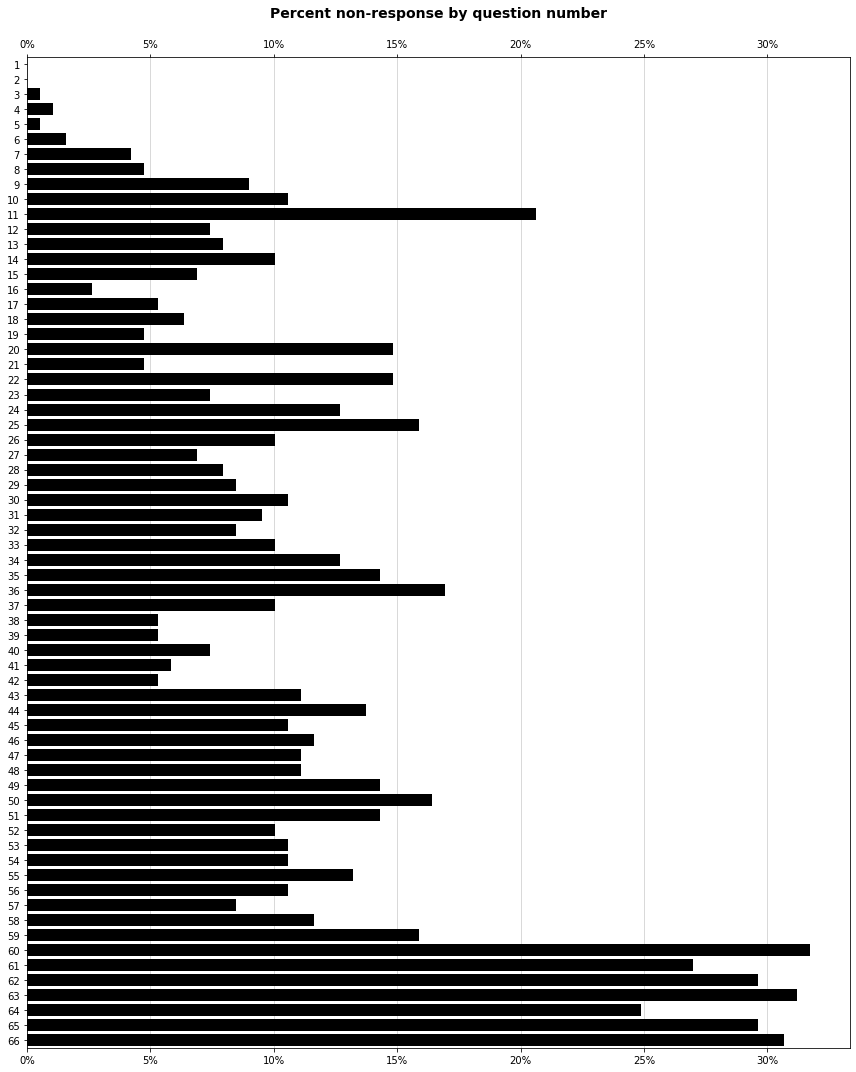

In [386]:
# create histogram of % non-response by question
q_idxs = arange(len(q_labels[2:]))
percent_no_response = []
for q_idx in q_idxs:    
    if NaN in survey[q_labels[2:][q_idx]].value_counts(normalize=True,dropna=False):
        percent_no_response.append(survey[q_labels[2:][q_idx]].value_counts(normalize=True,dropna=False)[NaN])
    else:
        percent_no_response.append(0.0)
percent_no_response = array(percent_no_response)

# plot
fig = plt.figure(figsize=(12,15))
plt.barh(q_idxs+1,100*percent_no_response,height=0.8,color='k',zorder=2)
plt.ylim([0.5,max(q_idxs+1.5)])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(base=1.0))
plt.gca().xaxis.set_ticks_position(position='both')
plt.gca().tick_params(axis='x',bottom=True,top=True,labelbottom=True,labeltop=True)
plt.title('Percent non-response by question number\n',weight='bold',fontsize=14)
# plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.grid(axis='x',alpha=0.6,zorder=1)
plt.tight_layout()
plt.savefig(root_dir + '2020-09-14 - SoO culture survey - analysis/UW SoO culture survey non-responses.pdf')